In [1]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('lab.cleaning.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
# Check nulls
data.isna().sum()/len(data)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [7]:
#Rename & Sneak Case change column names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [8]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date']


/var/folders/kf/4vf9b0_j063c6zf0vs_tltrc0000gn/T/ipykernel_94066/3788632823.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])


0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [9]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
categorical=data.select_dtypes(include=object)
numerical=data.select_dtypes(include=np.number)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


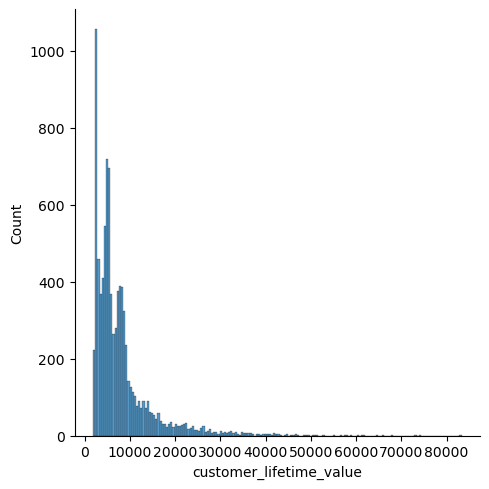

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


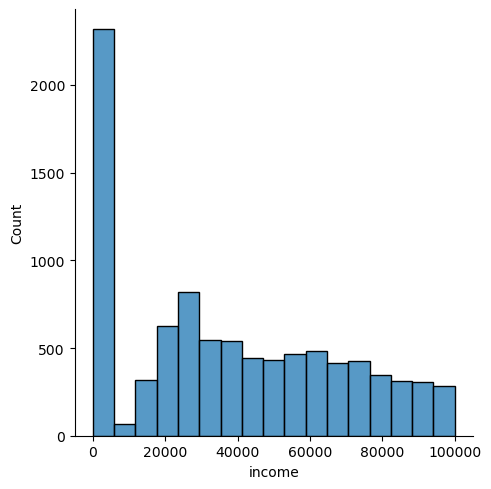

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


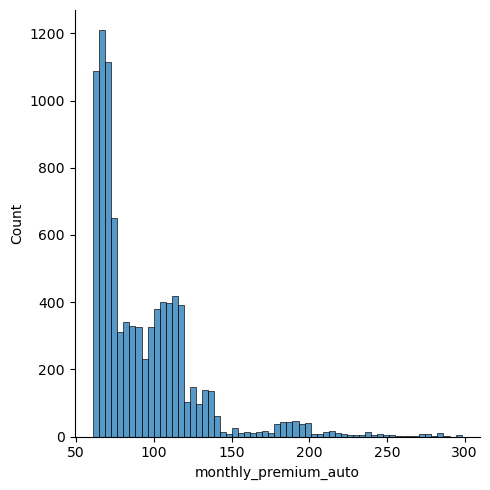

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


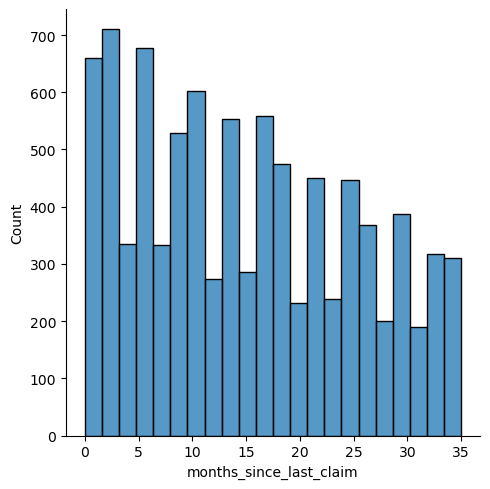

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


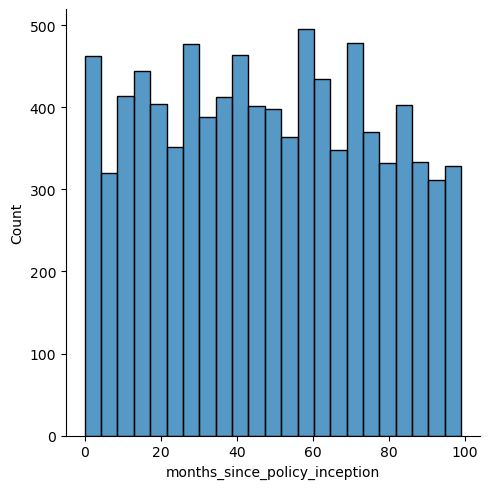

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


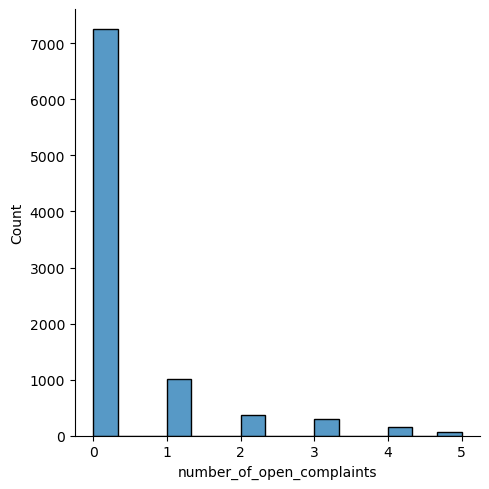

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


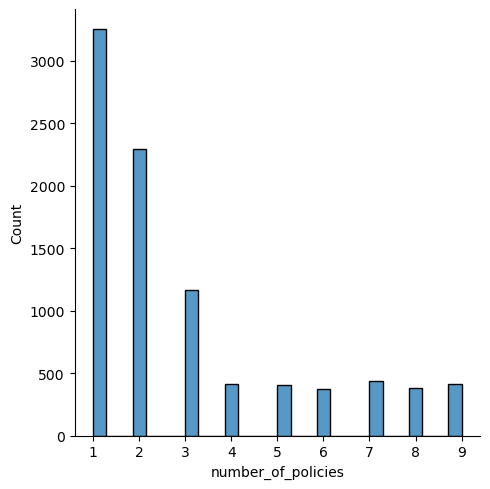

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


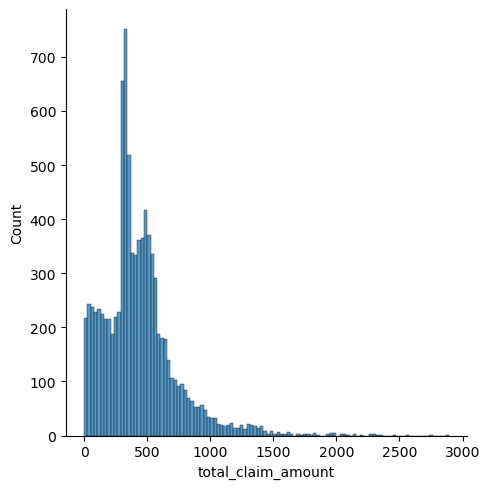

In [12]:
def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.displot(x=Dataframe[column])
        plt.show()
    return None
   

plot_num(numerical)

In [13]:
categorical_df = data.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
categorical_df.isnull().sum()/len(categorical_df)

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

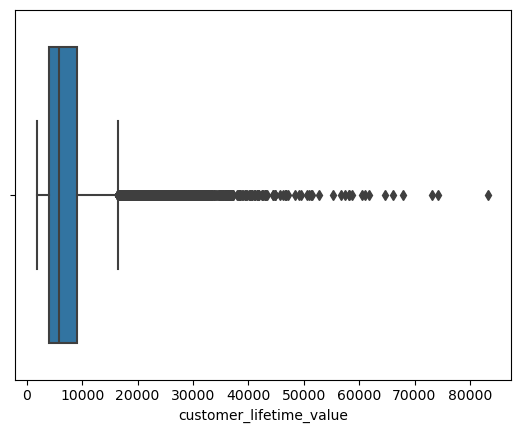

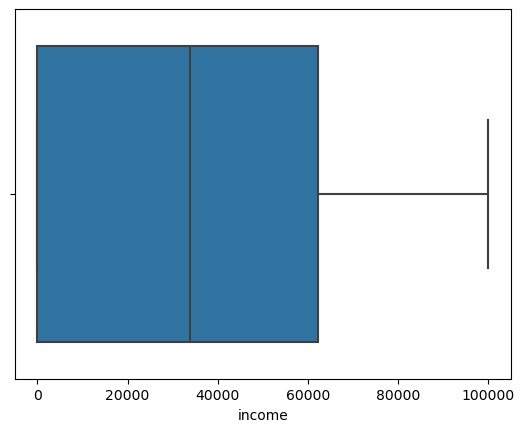

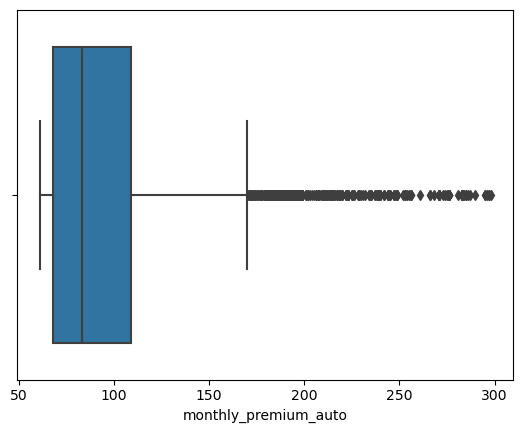

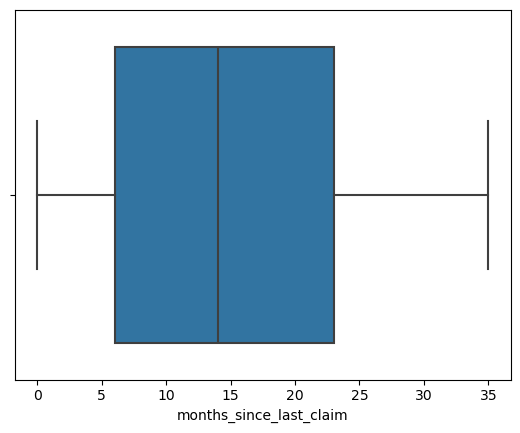

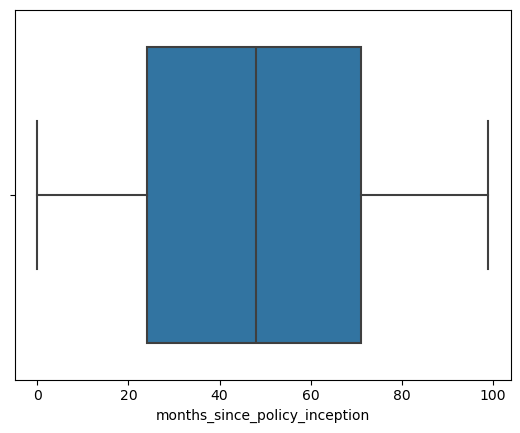

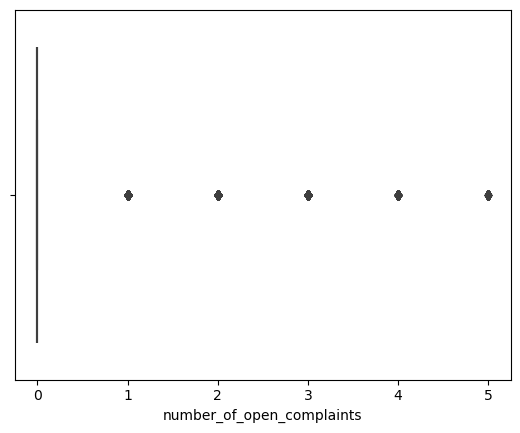

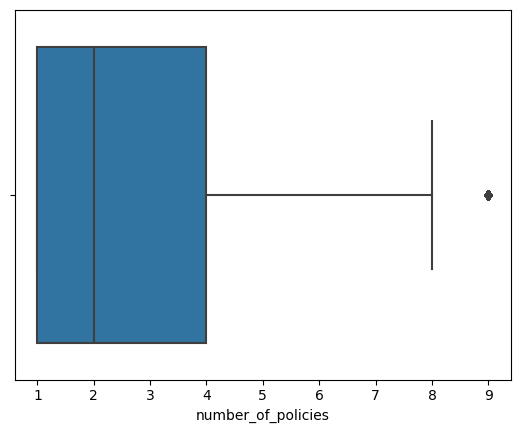

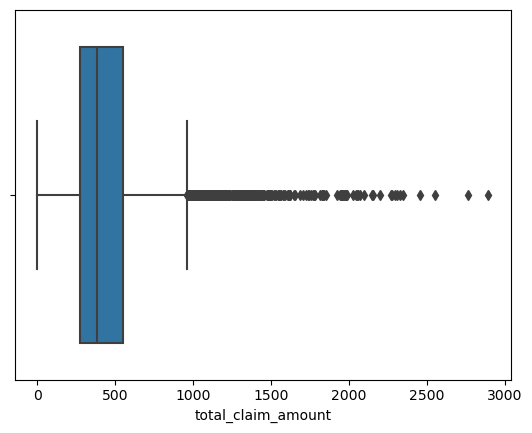

In [15]:
# Checking for outliers
def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None
   
outlier(numerical)

In [16]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [17]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [18]:
def value_count(df):
    for columns in df:
            print (len(numerical[columns].value_counts()),':  ',columns)
    return

value_count(numerical)

8041 :   customer_lifetime_value
5694 :   income
202 :   monthly_premium_auto
36 :   months_since_last_claim
100 :   months_since_policy_inception
6 :   number_of_open_complaints
9 :   number_of_policies
5106 :   total_claim_amount


In [19]:
print('Old Shape', numerical.shape)

Old Shape (9134, 8)


In [20]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [21]:
CLV_outliers = outliers(numerical["customer_lifetime_value"])
MPA_outliers = outliers(numerical["monthly_premium_auto"])

In [22]:
len(CLV_outliers)

211

In [23]:
len(MPA_outliers)

200

In [24]:
numerical.shape[0]* 0.01

91.34

In [25]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
   

In [26]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [27]:
num_discrete_df = numerical[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
num_continuous_df = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']]

In [28]:
num_continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [29]:
# Checking Correlations
correlations = numerical.corr()
correlations


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


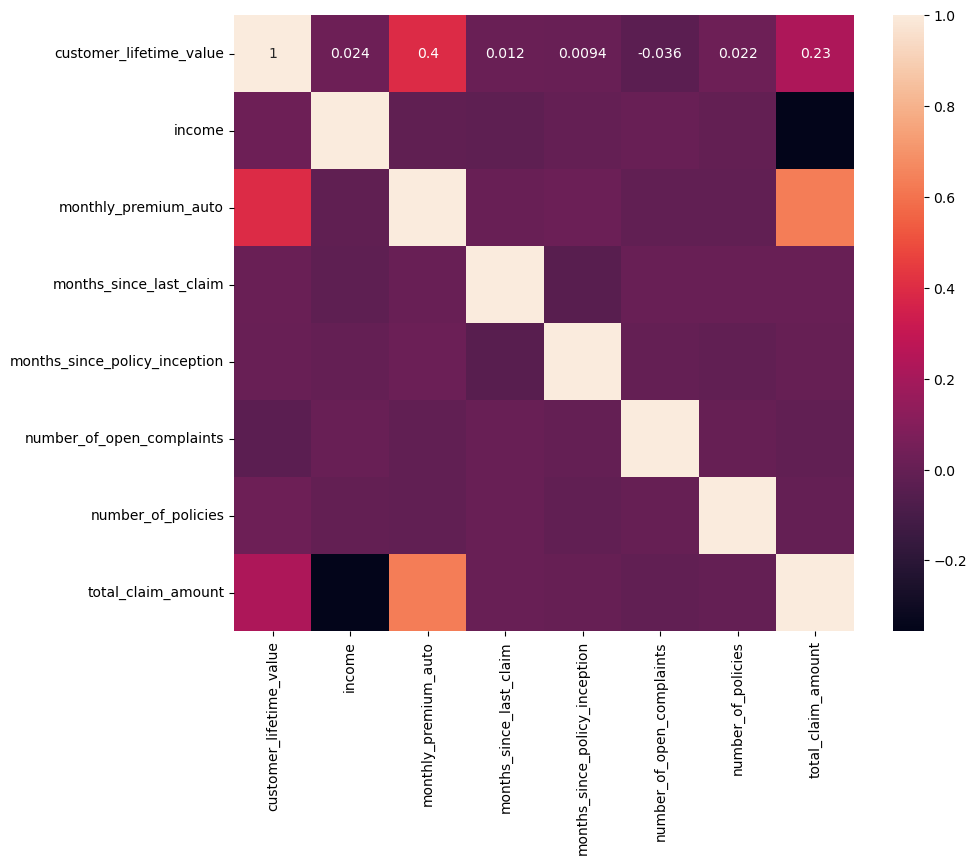

In [30]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

In [31]:
numerical.to_csv('lab-cleaned-numerical.csv', index=False)

In [32]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
categorical= categorical.drop(['customer'], axis = 1)

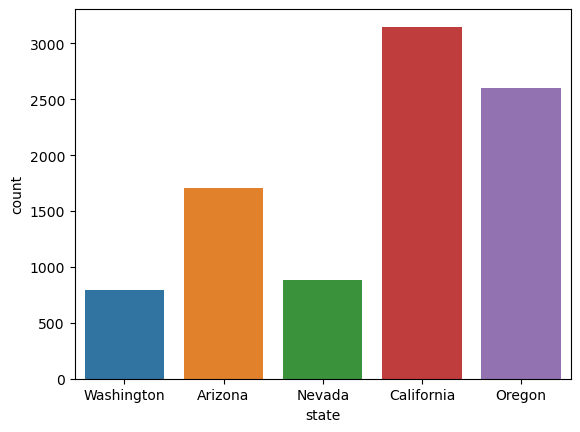

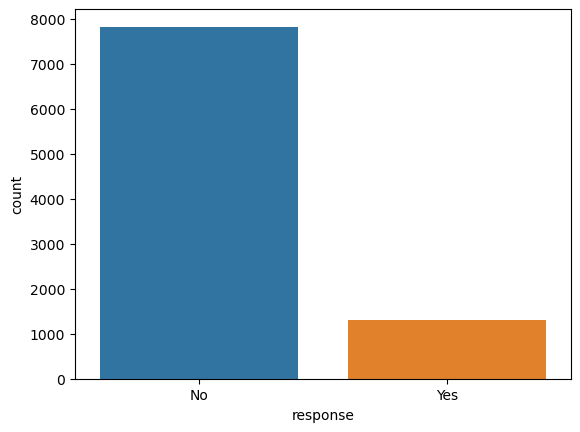

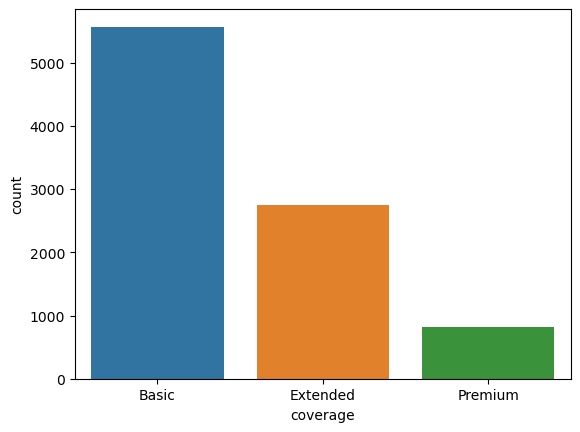

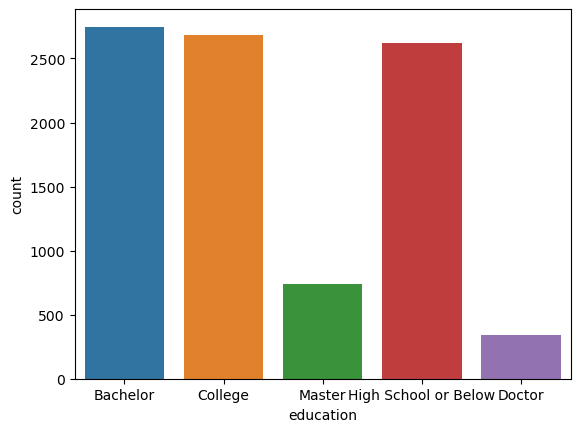

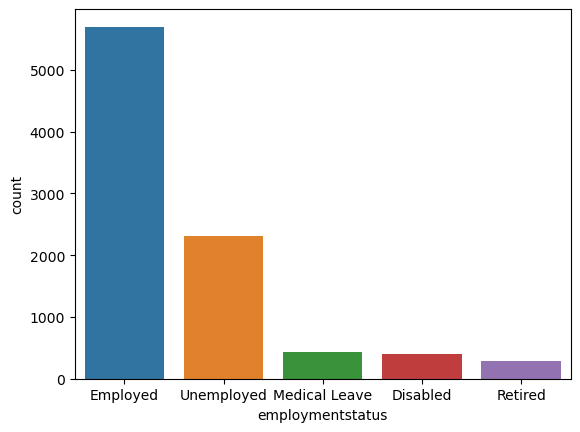

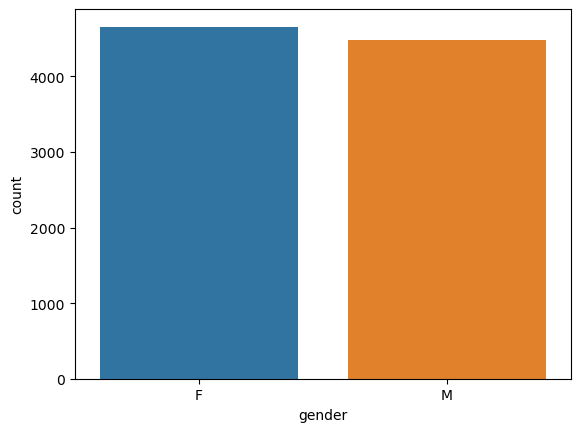

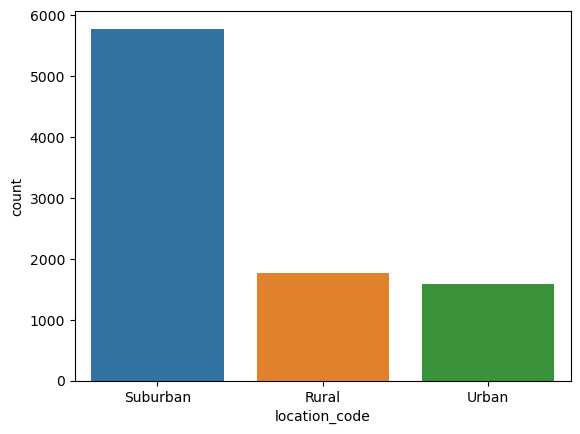

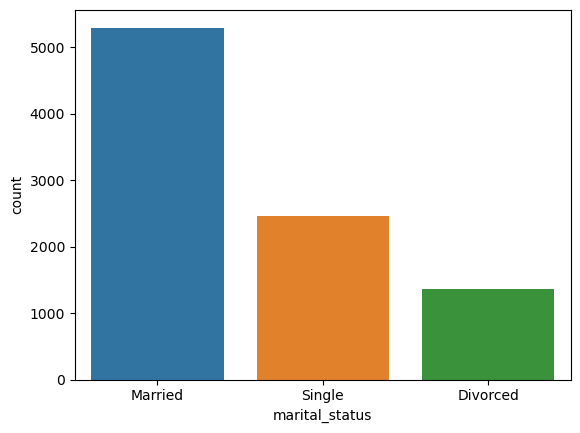

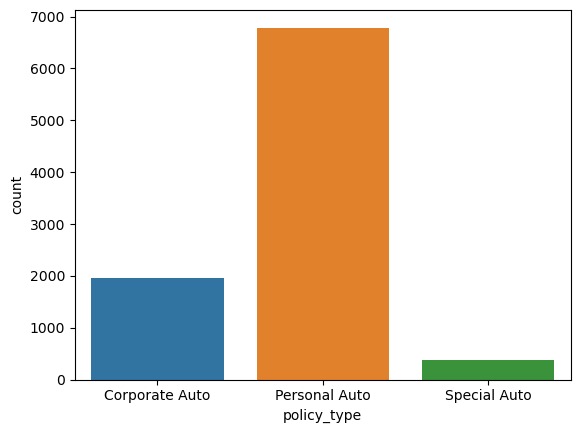

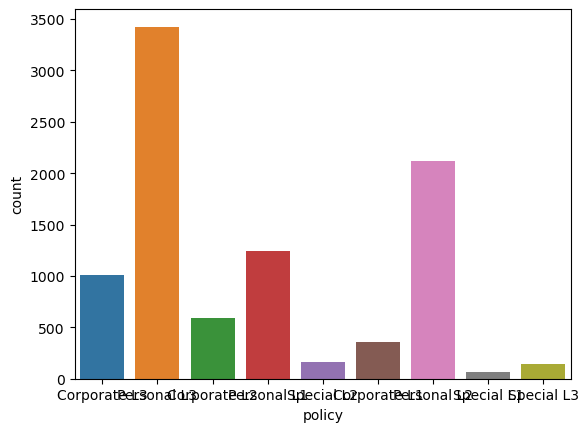

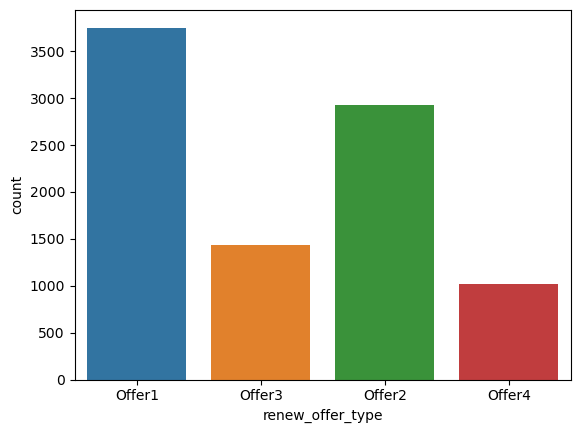

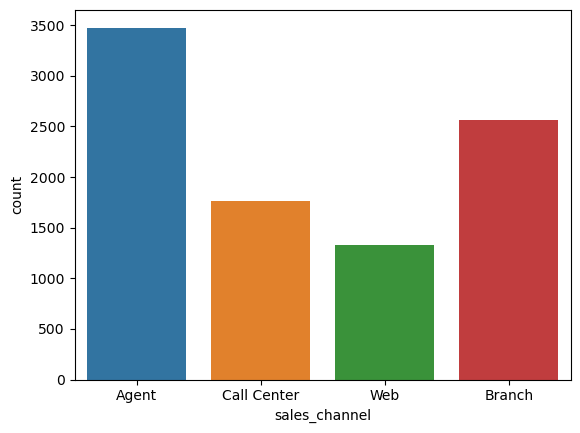

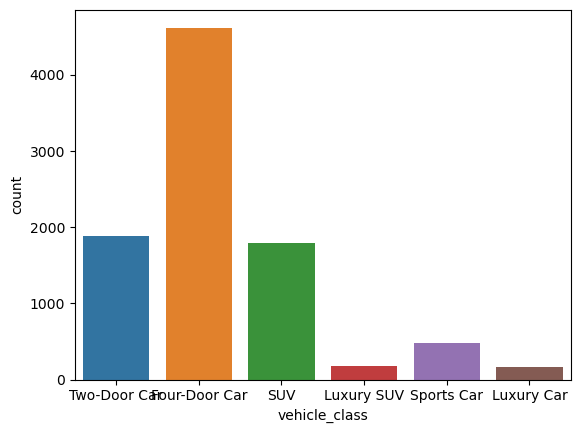

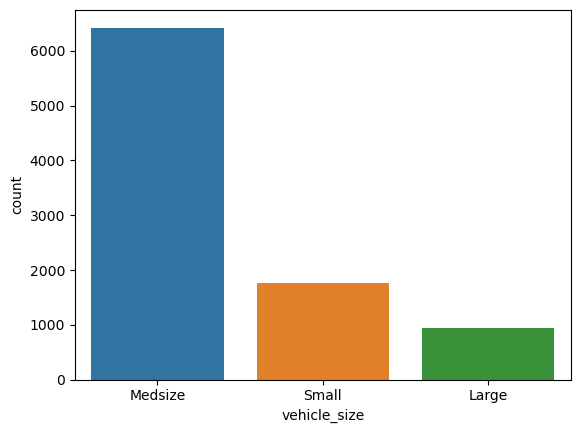

In [34]:
def plot_cat(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None
   

plot_cat(categorical)

In [35]:
categorical_columns = [col for col in categorical if (len(categorical[col].unique()) < (numerical.shape[0] * 0.01))]

In [36]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [37]:
# Checking the unique values of columns.

In [38]:
categorical['state'].value_counts()

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

In [39]:
categorical['response'].value_counts()

response
No     7826
Yes    1308
Name: count, dtype: int64

In [40]:
categorical['coverage'].value_counts()

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

In [41]:
categorical['education'].value_counts()

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [42]:
# Education
categorical['education'] = categorical['education'].fillna('Above High School')
categorical['education'] = np.where(categorical['education'].isin(['Bachelor', 'College', 'Master', 'Doctor']) ,'Above High School', categorical['education'])
categorical['education'].value_counts()


education
Above High School       6512
High School or Below    2622
Name: count, dtype: int64

In [43]:
categorical['employmentstatus'].value_counts()

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

In [44]:
categorical['gender'].value_counts()

gender
F    4658
M    4476
Name: count, dtype: int64

In [45]:
categorical['location_code'].value_counts()
# we can allocate Urban to Suburban

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

In [46]:
categorical['location_code'] = categorical['location_code'].fillna('Suburban')
categorical['location_code'] = np.where(categorical['location_code'].isin(['Urban']) ,'Suburban', categorical['location_code'])
categorical['location_code'].value_counts()

location_code
Suburban    7361
Rural       1773
Name: count, dtype: int64

In [47]:
categorical['sales_channel'].value_counts()

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

In [48]:
categorical['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

In [49]:
# luxury or Sport category
categorical['vehicle_class'] = categorical['vehicle_class'].fillna('Luxury or Sport')
categorical['vehicle_class'] = np.where(categorical['vehicle_class'].isin(['Luxury Car', 'Luxury SUV', 'Sports Car', 'SUV']) ,'Luxury or Sport', categorical['vehicle_class'])
categorical['vehicle_class'].value_counts()


vehicle_class
Four-Door Car      4621
Luxury or Sport    2627
Two-Door Car       1886
Name: count, dtype: int64

In [50]:
categorical['marital_status'].value_counts()

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

In [51]:
categorical['policy'].value_counts()

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

In [52]:
categorical['policy'] = categorical['policy'].fillna('Personal')
categorical['policy'] = np.where(categorical['policy'].isin(['Personal L3', 'Personal L2', 'Personal L1']) ,'Personal', categorical['policy'])


In [53]:
categorical['policy'] = categorical['policy'].fillna('Corporate')
categorical['policy'] = np.where(categorical['policy'].isin(['Corporate L3', 'Corporate L2', 'Corporate L1']) ,'Corporate', categorical['policy'])


In [54]:
categorical['policy'] = categorical['policy'].fillna('Special')
categorical['policy'] = np.where(categorical['policy'].isin(['Special L1', 'Special L2', 'Special L3']) ,'Special', categorical['policy'])
categorical['policy'].value_counts()

policy
Personal     6788
Corporate    1968
Special       378
Name: count, dtype: int64

In [55]:
categorical['policy_type'].value_counts()

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

In [56]:
# We can drop one of the columns: policy_type or policy columns. They provide same category feature in terms of data process. 

In [57]:
categorical = categorical.drop(['policy_type'], axis = 1)

In [58]:
categorical = categorical.drop(['location_code'], axis = 1)

In [59]:
categorical.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
marital_status      object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [60]:
categorical

,state,response,coverage,education,employmentstatus,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Above High School,Employed,F,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Above High School,Unemployed,F,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Above High School,Employed,F,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Above High School,Unemployed,M,Married,Corporate,Offer1,Call Center,Luxury or Sport,Medsize
4,Washington,No,Basic,Above High School,Employed,M,Single,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Above High School,Employed,M,Married,Personal,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,Above High School,Employed,F,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Above High School,Unemployed,M,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,Above High School,Employed,M,Married,Personal,Offer3,Branch,Four-Door Car,Large


In [61]:
categorical.to_csv('lab-cleaning-categorical.csv', index=False)

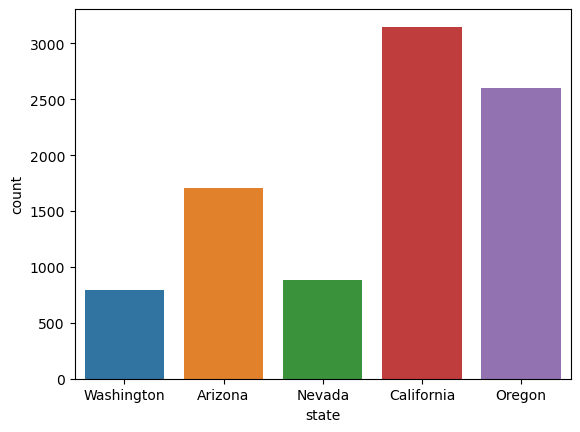

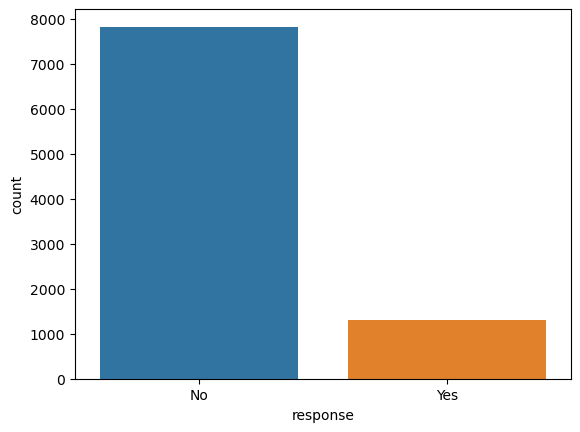

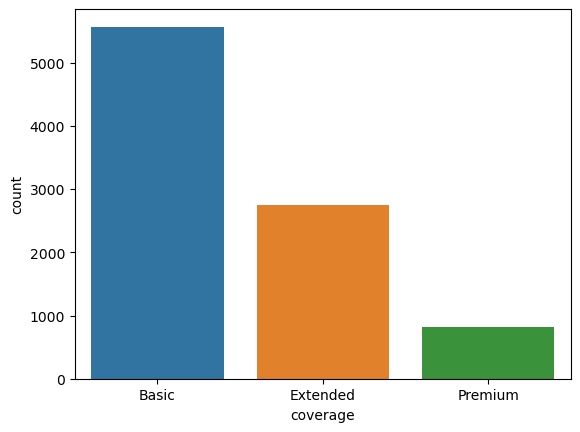

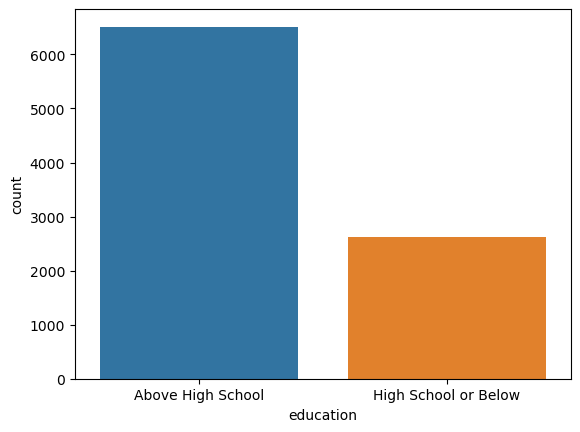

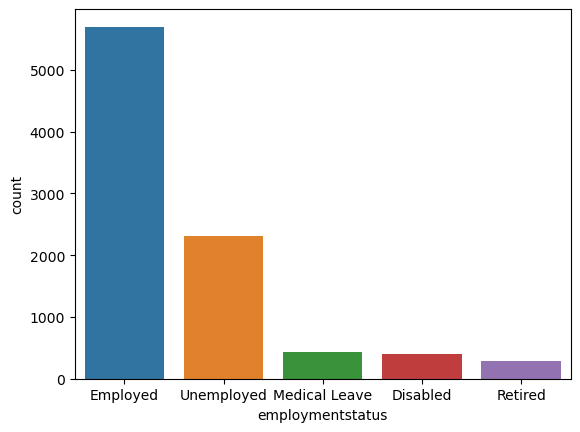

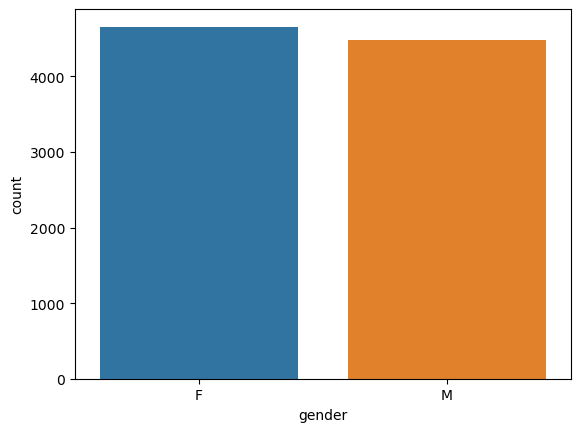

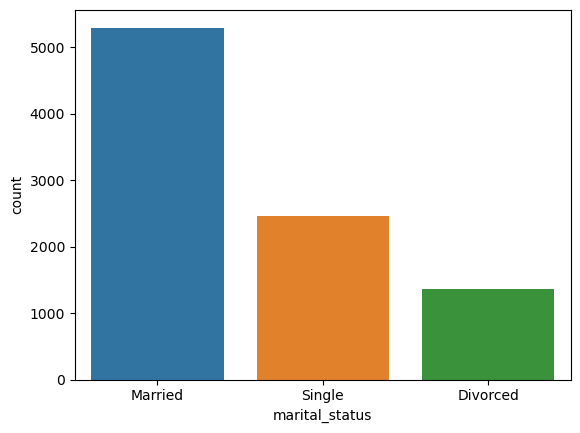

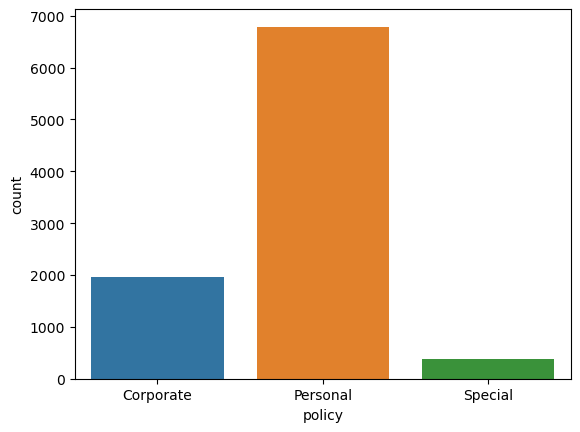

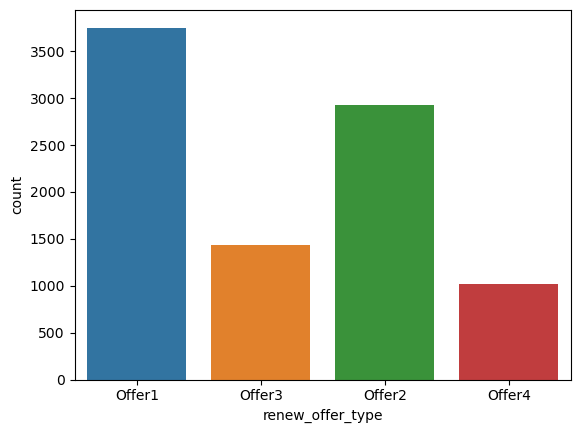

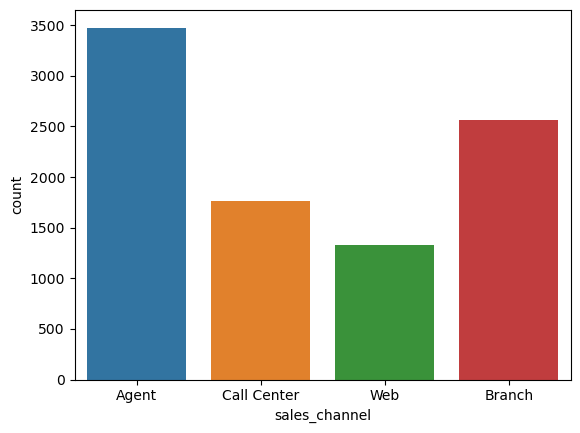

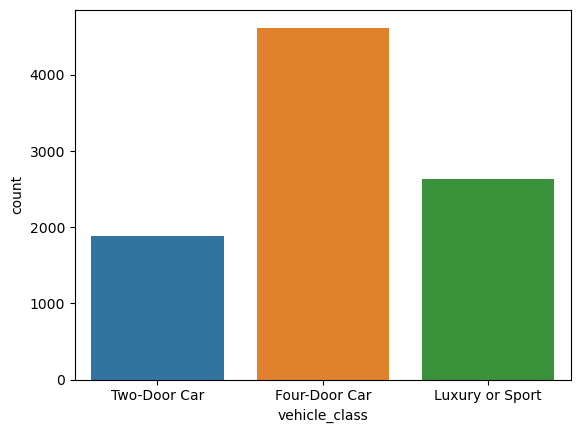

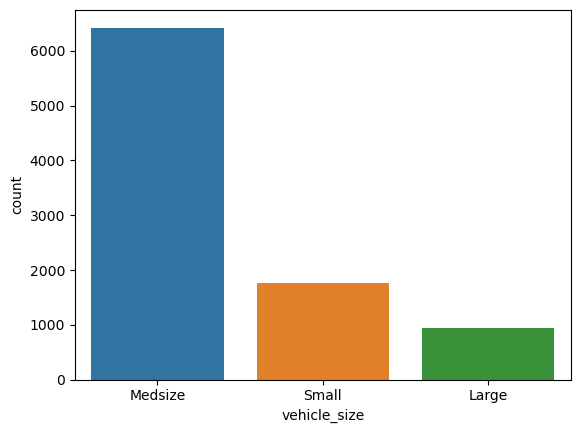

In [62]:
def plot_cat(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None
   

plot_cat(categorical)

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
cat = pd.read_csv('lab-cleaning-categorical.csv')
num = pd.read_csv('lab-cleaned-numerical.csv')
print(cat.shape)
print(num.shape)

(9134, 12)
(9134, 8)


In [65]:
cleaned_data = pd.concat([num,cat], axis = 1)
cleaned_data.shape

(9134, 20)

In [66]:
cleaned_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,Basic,Above High School,Employed,F,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,Above High School,Unemployed,F,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,Above High School,Employed,F,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,Basic,Above High School,Unemployed,M,Married,Corporate,Offer1,Call Center,Luxury or Sport,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,Basic,Above High School,Employed,M,Single,Personal,Offer1,Agent,Four-Door Car,Medsize


Train/Test/Split Data

In [67]:
X = pd.concat([num,cat], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
 8   state                          9134 non-null   object 
 9   response                       9134 non-null   object 
 10  coverage                       9134 non-null   object 
 11  education                      9134 non-null   object 
 12  employmentstatus               9134 non-null   o

In [68]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,Basic,Above High School,Employed,F,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,Above High School,Unemployed,F,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,Above High School,Employed,F,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,Basic,Above High School,Unemployed,M,Married,Corporate,Offer1,Call Center,Luxury or Sport,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,Basic,Above High School,Employed,M,Single,Personal,Offer1,Agent,Four-Door Car,Medsize


In [69]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   marital_status    9134 non-null   object
 7   policy            9134 non-null   object
 8   renew_offer_type  9134 non-null   object
 9   sales_channel     9134 non-null   object
 10  vehicle_class     9134 non-null   object
 11  vehicle_size      9134 non-null   object
dtypes: object(12)
memory usage: 856.4+ KB


In [70]:
y=X['total_claim_amount']
X=X.drop('total_claim_amount', axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (7307, 19)
y_train shape is: (7307,)
X_test shape is: (1827, 19)
y_test shape is: (1827,)


In [72]:
X_train["coverage"] = X_train["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [73]:

X_test["coverage"] = X_test["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [74]:
X_train['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Retired', 'Disabled'],
      dtype=object)

In [75]:
X_train["employmentstatus"] = X_train["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":1})

In [76]:
X_test["employmentstatus"] = X_test["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":1})

In [77]:
X_train['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [78]:
X_train["vehicle_size"] =X_train["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [79]:
X_test["vehicle_size"] =X_test["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [80]:
X_train["vehicle_class"].value_counts(dropna=False)

vehicle_class
Four-Door Car      3682
Luxury or Sport    2139
Two-Door Car       1486
Name: count, dtype: int64

In [82]:
X_train_1_hot_col = X_train[['state','response','gender','education','marital_status','policy','renew_offer_type','sales_channel','vehicle_class']]
X_train_1_hot_col

,state,response,gender,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
5123,Washington,No,M,Above High School,Married,Personal,Offer1,Agent,Two-Door Car
7738,Oregon,No,F,Above High School,Single,Special,Offer3,Branch,Four-Door Car
214,Arizona,No,M,Above High School,Divorced,Personal,Offer4,Agent,Four-Door Car
8580,California,No,F,Above High School,Married,Corporate,Offer3,Web,Four-Door Car
7857,Washington,No,F,Above High School,Single,Personal,Offer3,Web,Four-Door Car
...,...,...,...,...,...,...,...,...,...
5734,California,No,F,Above High School,Divorced,Personal,Offer3,Agent,Four-Door Car
5191,California,Yes,M,Above High School,Married,Personal,Offer1,Branch,Four-Door Car
5390,California,No,F,High School or Below,Single,Personal,Offer1,Call Center,Luxury or Sport
860,Arizona,Yes,F,Above High School,Divorced,Personal,Offer1,Call Center,Luxury or Sport


In [83]:
X_test_1_hot_col = X_test[['state','response','gender','education','marital_status','policy','renew_offer_type','sales_channel','vehicle_class']]
X_test_1_hot_col

,state,response,gender,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
708,California,No,M,High School or Below,Married,Personal,Offer2,Agent,Luxury or Sport
47,Oregon,No,F,High School or Below,Single,Personal,Offer4,Agent,Two-Door Car
3995,Oregon,Yes,F,Above High School,Married,Personal,Offer2,Agent,Two-Door Car
1513,California,No,F,Above High School,Married,Personal,Offer1,Branch,Four-Door Car
3686,Washington,No,F,High School or Below,Divorced,Personal,Offer1,Branch,Four-Door Car
...,...,...,...,...,...,...,...,...,...
4855,Oregon,No,F,Above High School,Divorced,Personal,Offer2,Agent,Luxury or Sport
1880,Arizona,No,M,High School or Below,Married,Personal,Offer4,Branch,Two-Door Car
8472,Oregon,No,F,Above High School,Married,Corporate,Offer1,Branch,Luxury or Sport
5967,Washington,No,M,High School or Below,Single,Personal,Offer1,Agent,Four-Door Car


In [84]:
# OneHotEncode the remaining categorical columns

encoder = OneHotEncoder(drop='first').fit(X_train_1_hot_col)
cols = encoder.get_feature_names_out(input_features = X_train_1_hot_col.columns)
X_train_col_encoded = pd.DataFrame(encoder.transform(X_train_1_hot_col).toarray(),columns=cols)
X_train_col_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,education_High School or Below,marital_status_Married,marital_status_Single,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury or Sport,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7304,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7305,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
cols1 = encoder.get_feature_names_out(input_features = X_test_1_hot_col.columns)

X_test_col_encoded = pd.DataFrame(encoder.transform( X_test_1_hot_col).toarray(),columns=cols1)

X_test_col_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,education_High School or Below,marital_status_Married,marital_status_Single,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury or Sport,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1823,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1824,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1825,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
X_train = X_train.drop(['state','response','education','gender','marital_status','policy','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
X_train=X_train.reset_index()
X_train

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,vehicle_size
0,5123,4768.955924,51144,61,28,32,1,9,0.0,1.0,0.5
1,7738,2827.559570,0,79,30,25,0,1,0.5,0.0,0.5
2,214,2912.892035,81097,74,7,67,0,1,0.0,1.0,0.0
3,8580,5138.244998,72264,64,2,66,0,9,0.0,1.0,0.5
4,7857,2610.369217,54737,66,3,86,0,1,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
7302,5734,7334.328083,87957,61,31,63,0,2,0.0,1.0,0.0
7303,5191,5498.940679,22520,73,17,64,0,3,0.0,0.0,0.5
7304,5390,8992.779137,0,129,13,4,0,7,0.5,0.0,0.5
7305,860,14635.451580,0,139,5,56,0,2,0.5,0.0,0.5


In [87]:
X_test = X_test.drop(['state','response','education','gender','marital_status','policy','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
X_test = X_test.reset_index()
X_test

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,vehicle_size
0,708,4222.631209,74585,106,1,49,0,1,0.0,1.0,0.5
1,47,5514.344018,23218,71,7,10,0,4,0.0,1.0,0.5
2,3995,3808.122147,94903,94,3,38,0,1,0.5,1.0,0.0
3,1513,7914.823110,77153,99,3,27,1,5,0.5,1.0,0.5
4,3686,7931.722181,23769,69,18,14,0,2,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
1822,4855,8688.754812,59098,110,31,73,0,3,0.0,1.0,0.5
1823,1880,7623.580733,69900,64,23,68,0,2,0.0,1.0,1.0
1824,8472,4660.399573,89834,116,24,11,0,1,0.0,1.0,0.5
1825,5967,2089.337182,0,63,30,6,1,1,0.0,0.0,0.0


In [88]:
X_train = X_train.drop('index', axis=1)
X_test = X_test.drop('index',axis=1)

In [89]:
X_train_encoded= pd.concat([X_train,X_train_col_encoded],axis=1)
X_train_encoded= X_train_encoded.reset_index()
X_train_encoded= X_train_encoded.drop('index',axis=1)

In [90]:
X_test_encoded= pd.concat([X_test,X_test_col_encoded],axis=1)
X_test_encoded= X_test_encoded.reset_index()
X_test_encoded= X_test_encoded.drop('index',axis=1)
X_test_encoded

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,education_High School or Below,marital_status_Married,marital_status_Single,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury or Sport,vehicle_class_Two-Door Car
0,4222.631209,74585,106,1,49,0,1,0.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5514.344018,23218,71,7,10,0,4,0.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3808.122147,94903,94,3,38,0,1,0.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7914.823110,77153,99,3,27,1,5,0.5,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7931.722181,23769,69,18,14,0,2,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,8688.754812,59098,110,31,73,0,3,0.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1823,7623.580733,69900,64,23,68,0,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1824,4660.399573,89834,116,24,11,0,1,0.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1825,2089.337182,0,63,30,6,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#Standardize needed columns
X_train.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
coverage                         float64
employmentstatus                 float64
vehicle_size                     float64
dtype: object

In [92]:
X_train_to_scale = X_train[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
X_train_to_scale
X_test_to_scale = X_test[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
X_test_to_scale

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4222.631209,74585,106,1,49,0,1
1,5514.344018,23218,71,7,10,0,4
2,3808.122147,94903,94,3,38,0,1
3,7914.823110,77153,99,3,27,1,5
4,7931.722181,23769,69,18,14,0,2
...,...,...,...,...,...,...,...
1822,8688.754812,59098,110,31,73,0,3
1823,7623.580733,69900,64,23,68,0,2
1824,4660.399573,89834,116,24,11,0,1
1825,2089.337182,0,63,30,6,1,1


In [93]:
#Initialize and fit the scaler
transformer = MinMaxScaler().fit(X_train_to_scale)
X_norm1 = transformer.transform(X_train_to_scale)
X_train_scaled = pd.DataFrame(X_norm1, columns=X_train_to_scale.columns)
X_train_scaled = X_train_scaled.reset_index()
###
X_norm2 = transformer.transform(X_test_to_scale)
X_test_scaled = pd.DataFrame(X_norm2, columns=X_test_to_scale.columns)
X_test_scaled= X_test_scaled.reset_index()


In [94]:
X_train = X_train.drop(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'],axis = 1)
X_test = X_test.drop(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'], axis = 1)

In [95]:
X_train_s_e = pd.concat([X_train, X_train_scaled],axis = 1)
X_test_s_e = pd.concat([X_test, X_test_scaled], axis = 1)

In [96]:
X_train_s_e.isna().sum()

coverage                         0
employmentstatus                 0
vehicle_size                     0
index                            0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [97]:
# Define function to run all models
def models_automation(models, X_tr, y_tr,X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [98]:
model_list = [LinearRegression(),KNeighborsRegressor(), MLPRegressor()]
models_automation(model_list, X_train_s_e, y_train, X_test_s_e, y_test)

# model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
# models_automation(model_list, X_train_s_e, y_train,,X_test_s_e, y_test)

LinearRegression: Train -> 0.5392070313484704, Test -> 0.5136828258668078
KNeighborsRegressor: Train -> 0.20492347190832183, Test -> -0.250819156780262
MLPRegressor: Train -> 0.35845578755506113, Test -> 0.3520944223321252


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
